In [1]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
df = pd.read_csv("loan_training_data.csv").sample(frac=.25, random_state=1234)
df.reset_index(drop=True, inplace=True)

#Load in data dictionary
# Loan S
data_dict = pd.read_csv("the_data_dictionary.csv")

In [2]:
dummy_term = pd.get_dummies(df['term'], prefix='term')
dummy_grade = pd.get_dummies(df['grade'], prefix='grade')
dummy_emp_length = pd.get_dummies(df['emp_length'], prefix='emp_length')
dummy_home_ownership = pd.get_dummies(df['home_ownership'], prefix='home_ownership')
dummy_verification_status = pd.get_dummies(df['verification_status'], prefix='verification_status')
dummy_purpose = pd.get_dummies(df['purpose'], prefix='purpose')
cols_to_keep = ['loan_amnt', 
                'installment', 
                'annual_inc', 
                'dti', 
                'delinq_2yrs', 
                'open_acc', 
                'revol_bal', 
                'total_acc',
                'tot_coll_amt',
                'tot_cur_bal',
                'total_rev_hi_lim',
                'avg_cur_bal',
                'bc_util',
                'mort_acc',
                'num_accts_ever_120_pd',
                'num_actv_bc_tl',
                'num_actv_rev_tl',
                'num_bc_sats',
                'num_bc_tl',
                'num_rev_tl_bal_gt_0',
                'num_tl_90g_dpd_24m',
                'num_tl_op_past_12m',
                'total_bal_ex_mort',
                'total_bc_limit',
                'total_il_high_credit_limit',
                'fico_average']
data = df[cols_to_keep].join(dummy_term).join(dummy_grade).join(dummy_emp_length).join(dummy_home_ownership).join(dummy_verification_status).join(dummy_purpose)
X_all = df.drop("loan_status", axis=1)
y_all = df.loan_status
X_all = data._get_numeric_data()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

C:\Users\jquella\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
scale = StandardScaler()
Xs = scale.fit_transform(X_all)

In [7]:
#  Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test= train_test_split(Xs, y_all, train_size=0.8, random_state=1)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 20000 samples.
Testing set has 5000 samples.


In [8]:
from sklearn.metrics import confusion_matrix
#Profit calculator
def profit_calculator(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    tp = cm[1,1]
    fp = cm[0,1]
    return 100*tp - 1000*fp

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X_all,y_all)
# def predictor(model, X_train, X_test, y_train, thres=.5):
#     #Initialize Model
#     mod = model()
#     #Train model on training data
#     mod.fit(X_train, y_train)
#     #Make predictions on the testing set (X_test)
#     preds = mod.predict_proba(X_test)
#     #preds >= thres returns boolean values
#     #np.where replaces True with 1 and False with 0
#     threshold_adjusted_preds = np.where(preds>=thres, 1, 0)
#     #Return the 2nd column. The 2nd columns is probabiltity of success.
#     #Returns an array of 1s and 0s
#     return threshold_adjusted_preds[:,1]
# thres_preds = predictor(GradientBoostingClassifier, X_train, X_test, y_train)
# profit_calculator(y_test, thres_preds)

-603200

In [15]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=42)
# clf = clf.fit(X_train, y_train)

In [16]:
# from sklearn import metrics
# pred_probs = clf.predict_proba(X_test)[:,1]
# fpr, tpr, thres = metrics.roc_curve(y_test, pred_probs)
# metrics.roc_auc_score(y_test, pred_probs)

0.65165809291436805

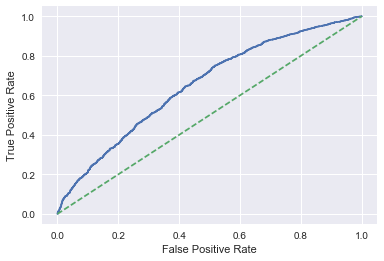

In [17]:
# import matplotlib.pyplot as plt
# %matplotlib inline 

# plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1], "--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(random_state=42)
clf2 = clf2.fit(X_train, y_train)

In [20]:
pred_probs = clf2.predict_proba(X_test)[:,1]
fpr, tpr, thres = metrics.roc_curve(y_test, pred_probs)
metrics.roc_auc_score(y_test, pred_probs)

0.71308428719666339

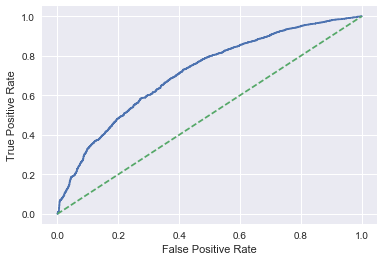

In [21]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [41]:
preds = clf2.predict_proba(X_test)
threshold_adjusted_preds = np.where(preds>=0.9, 1, 0)
profit_calculator(y_test, threshold_adjusted_preds[:,1])

59100

In [ ]:
# from sklearn.grid_search import GridSearchCV
# from sklearn.metrics import make_scorer

# # Create the parameters list you wish to tune
# parameters = [{'max_depth':[2,3,4]},{'n_estimators':[20,50,75,100,150]},{'learning_rate':[.02,.03,.05,.1,.15]}]

# # Initialize the classifier
# clf_grid = GradientBoostingClassifier(random_state=42)

# # Perform grid search on the classifier using the roc_auc as the scoring method
# grid_obj = GridSearchCV(clf_grid, parameters, scoring='roc_auc',cv=5)

# # Fit the grid search object to the training data and find the optimal parameters
# grid_obj = grid_obj.fit(X_train, y_train)

# # Get the estimator
# clf_grid = grid_obj_best_estimator_

In [ ]:
# pred_probs = clf_grid.predict_proba(X_test)[:,1]
# fpr, tpr, thres = metrics.roc_curve(y_test, pred_probs)
# metrics.roc_auc_score(y_test, pred_probs)

# plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1], "--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.show()

In [49]:
dft = pd.read_csv("loan_testing_data.csv").sample(frac=.2, random_state=1234)
dft.reset_index(drop=True, inplace=True)

In [50]:
dummy_term = pd.get_dummies(dft['term'], prefix='term')
dummy_grade = pd.get_dummies(dft['grade'], prefix='grade')
dummy_emp_length = pd.get_dummies(dft['emp_length'], prefix='emp_length')
dummy_home_ownership = pd.get_dummies(dft['home_ownership'], prefix='home_ownership')
dummy_verification_status = pd.get_dummies(dft['verification_status'], prefix='verification_status')
dummy_purpose = pd.get_dummies(dft['purpose'], prefix='purpose')
cols_to_keep = ['loan_amnt', 
                'installment', 
                'annual_inc', 
                'dti', 
                'delinq_2yrs', 
                'open_acc', 
                'revol_bal', 
                'total_acc',
                'tot_coll_amt',
                'tot_cur_bal',
                'total_rev_hi_lim',
                'avg_cur_bal',
                'bc_util',
                'mort_acc',
                'num_accts_ever_120_pd',
                'num_actv_bc_tl',
                'num_actv_rev_tl',
                'num_bc_sats',
                'num_bc_tl',
                'num_rev_tl_bal_gt_0',
                'num_tl_90g_dpd_24m',
                'num_tl_op_past_12m',
                'total_bal_ex_mort',
                'total_bc_limit',
                'total_il_high_credit_limit',
                'fico_average']
data_test = dft[cols_to_keep].join(dummy_term).join(dummy_grade).join(dummy_emp_length).join(dummy_home_ownership).join(dummy_verification_status).join(dummy_purpose)
X_all_test = dft.drop("loan_status", axis=1)
y_all_test = dft.loan_status
X_all_test = data_test._get_numeric_data()

In [51]:
scale = StandardScaler()
Xs_test = scale.fit_transform(X_all_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(random_state=42)
clf2 = clf2.fit(Xs_test, y_all_test)

In [48]:
preds = clf2.predict_proba(Xs_test)
threshold_adjusted_preds = np.where(preds>=0.9, 1, 0)
profit_calculator(y_all_test, threshold_adjusted_preds[:,1])

140100